# 逻辑回归

* 逻辑回归并不是回归，而是分类。
* 逻辑回归与梯度下降相似，但是跟线性回归的损失函数不同，而且最终输出的数值也需要用sigmoid函数调整。有点类似于NLP中的微调。


## 参考
* 算法 https://www.bilibili.com/video/BV1V7411P7wL
* 数据集 鸢尾花数据集见前 

## 数据预处理

In [12]:
import numpy as np
import pandas as pd

data = pd.read_csv('/data/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
data.drop('Id', axis = 1, inplace = True)

In [14]:
data.drop_duplicates(inplace = True)

In [15]:
data['Species'].drop_duplicates()

0          Iris-setosa
50     Iris-versicolor
100     Iris-virginica
Name: Species, dtype: object

In [16]:
data['Species'] = data['Species'].map({'Iris-setosa': 1, 'Iris-versicolor':0, 'Iris-virginica':2 })

In [17]:
data = data[data['Species'] != 2]
len(data)

98

## 逻辑回归算法

In [28]:
class LogisticRegression:
    
    def __init__(self, alpha, times):
        self.alpha = alpha
        self.times = times
        
    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))
    
    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.loss_ = []
        
        for i in range(self.times):
            z = np.dot(X, self.w_[1:]) + self.w_[0]
            p = self.sigmoid(z)
            
            cost = -np.sum(y * np.log(p) + (1-y) * np.log(1-p))
            self.loss_.append(cost)
            
            self.w_[0] += self.alpha * np.sum(y - p)
            self.w_[1:] += self.alpha * np.dot(X.T, y-p)
            
    def predict_proba(self, X):
        X = np.asarray(X)
        z = np.dot(X, self.w_[1:])+self.w_[0]
        p = self.sigmoid(z)
        p = p.reshape(-1,1)
        return np.concatenate([1-p,p], axis =1)
        
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis =1)

## 训练和预测

In [29]:
t1 = data[data['Species'] == 0]
t2 = data[data['Species'] == 1]
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)

train_X = pd.concat([t1.iloc[:40, :-1], t2.iloc[:40, :-1]], axis = 0)
train_y = pd.concat([t1.iloc[:40, -1], t2.iloc[:40, -1]], axis = 0)
test_X = pd.concat([t1.iloc[40:, :-1], t2.iloc[40:, :-1]], axis = 0)
test_y = pd.concat([t1.iloc[40:, -1], t2.iloc[40:, -1]], axis = 0)

#注意这里量级相同并没有做标准化处理。
lr = LogisticRegression(alpha=0.01, times=20)
lr.fit(train_X, train_y)
lr.predict_proba(test_X)

array([[0.99556826, 0.00443174],
       [0.98410068, 0.01589932],
       [0.98776425, 0.01223575],
       [0.98963123, 0.01036877],
       [0.99280127, 0.00719873],
       [0.99069063, 0.00930937],
       [0.99491877, 0.00508123],
       [0.99324116, 0.00675884],
       [0.99102776, 0.00897224],
       [0.99371804, 0.00628196],
       [0.00933381, 0.99066619],
       [0.00702376, 0.99297624],
       [0.02071892, 0.97928108],
       [0.07037915, 0.92962085],
       [0.01714725, 0.98285275],
       [0.02642633, 0.97357367],
       [0.00813116, 0.99186884],
       [0.00819442, 0.99180558]])

In [30]:
lr.predict(test_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [32]:
result = lr.predict(test_X)
display(np.sum(result == test_y), len(result))

18

18

## 可视化

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

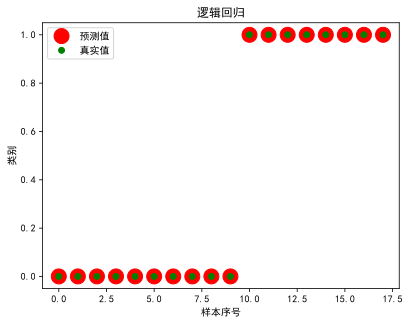

In [34]:
plt.plot(result, 'ro', ms=15, label='预测值')
plt.plot(test_y.values, 'go', label ='真实值')
plt.title('逻辑回归')
plt.xlabel('样本序号')
plt.ylabel('类别')
plt.legend()
plt.show()

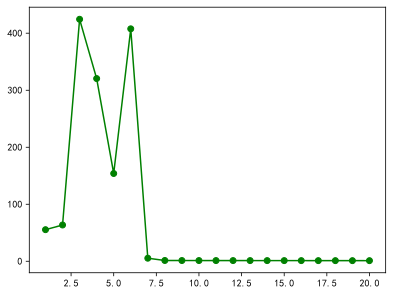

In [35]:
plt.plot(range(1, lr.times+1),lr.loss_, 'go-')